<a href="https://colab.research.google.com/github/aditya0589/notebooks/blob/main/Deep%20Learning/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perceptron**
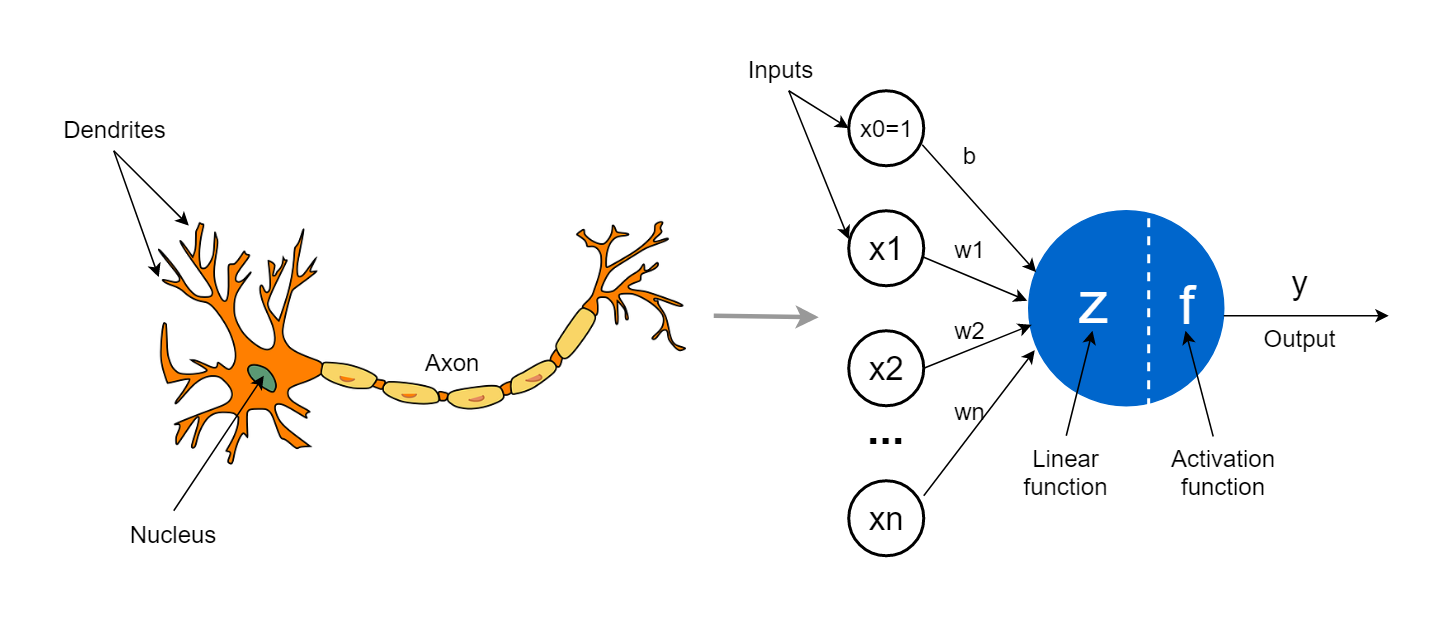


## **Steps in a Perceptron Processing**
1. Weight calculation: <br>
$$
z = \sum_{i=1}^{n} w_i x_i + b
$$

2. Applying activation function
$$
    g(z)  
$$
<br>g is the activation function

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

df = pd.DataFrame(
    [
        [8.54, 0.12, 1],
        [6.27, 5.17, 0],
        [8.27, 8.86, 1],
        [6.88, 7.27, 1],
        [7.52, 7.30, 1],
    ],
    columns=['cgpa', 'resume_score', 'placed']
)



In [4]:
df

,cgpa,resume_score,placed
0,8.54,0.12,1
1,6.27,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

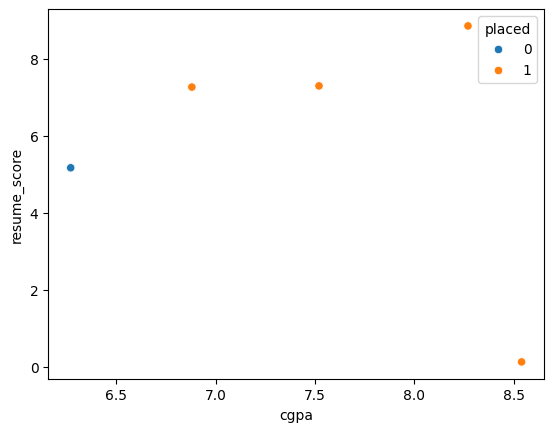

In [5]:
sns.scatterplot(
    x=df['cgpa'],
    y=df['resume_score'],
    hue=df['placed']
)

In [6]:
from sklearn.linear_model import Perceptron

In [9]:
X = df.drop('placed', axis=1)
y = df['placed']

In [7]:
p = Perceptron()

In [10]:
p.fit(X, y)

Perceptron()

## **The Perceptron trick**

The perceptron trick is a way to remove the bias term by converting it into an extra weight and input.

Normal Perceptron formula:
$$
z = \sum_{i=1}^{n} w_i x_i + b
$$
 where:
 - $w_i$ = weights  
- $x_i$ = inputs  
- $b$ = bias  

The Perceptron trick adds one extra input:
$$
x_0 = 1
$$

and one extra weight
$$
w_0 = b
$$

The new formula is obtained as follows:
$$
z = \sum_{i=0}^{n} w_i x_i
$$

This way, the bias term is removed but its effect still remains


In [12]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [13]:
import matplotlib.pyplot as plt

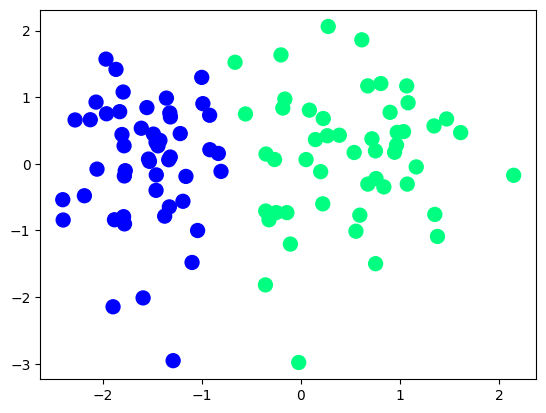

In [16]:

plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [17]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [18]:

def step(z):
    return 1 if z>0 else 0

In [19]:
intercept_,coef_ = perceptron(X,y)

In [20]:
print(coef_)
print(intercept_)

[1.36524619 0.11668711]
0.9


In [21]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [22]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

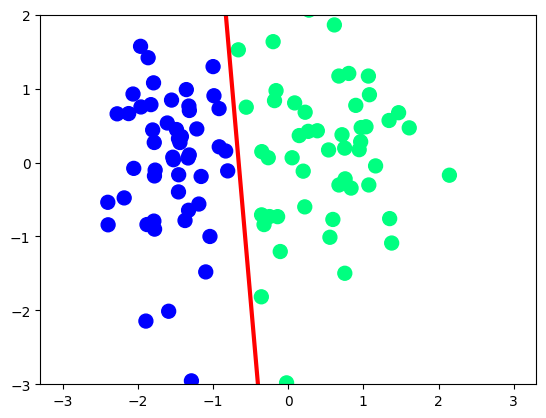

In [24]:

plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)